# K Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. The objective of K-means is simple, group similar data points together and discover underlying patterns. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

## Methods used in this notebook
1. Sci-kit Learn
2. Euclidean distance

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

In [2]:
df = pd.read_csv("datasets/iris.csv")

## 1. Understanding the Data

In [3]:
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
len(df)

150

## 2. Visualizing the Data Set

<AxesSubplot:>

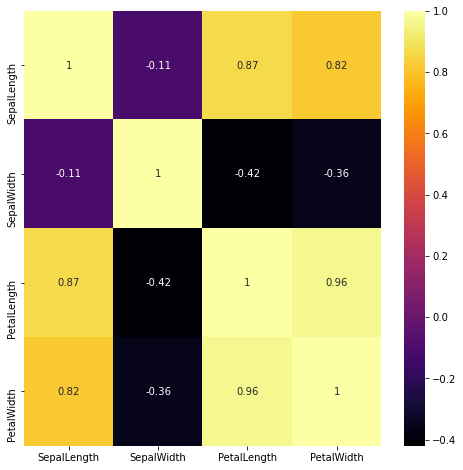

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='inferno')

The highest correlation values we get are 
* 0.96 - Petal Length and Petal Width 
* 0.87 - Petal Length and Sepal Length 
* 0.82 - Petal Width and Sepal Length

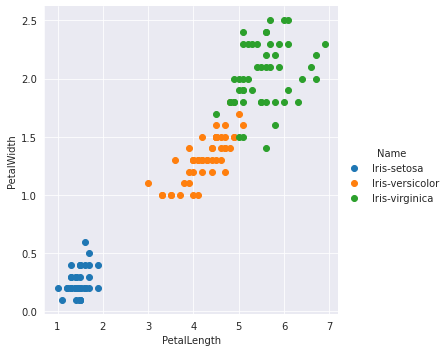

In [6]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Name", height=5).map(plt.scatter, "PetalLength", "PetalWidth").add_legend()
plt.show()

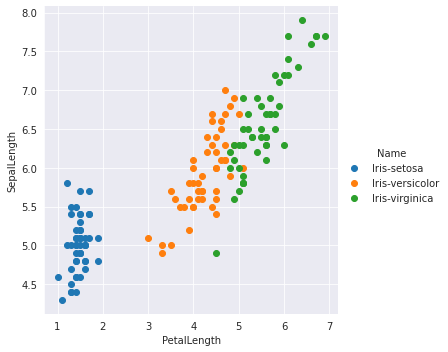

In [7]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Name", height=5).map(plt.scatter, "PetalLength", "SepalLength").add_legend()
plt.show()

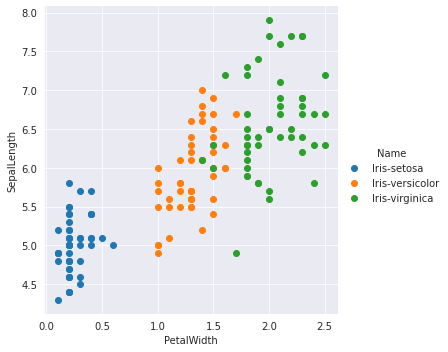

In [8]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Name", height=5).map(plt.scatter, "PetalWidth", "SepalLength").add_legend()
plt.show()

In [9]:
X = df.iloc[:, [0, 1, 2, 3]].values

## 3. Findind the optimal number of clusters

### Elbow Method
The Elbow Method is one of the most popular methods to determine this optimal value of k. 
We calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. 

The steps can be summarized in the below steps:
1. Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.
2. For each K, calculate the total within-cluster sum of square (WCSS).
3. Plot the curve of WCSS vs the number of clusters K.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

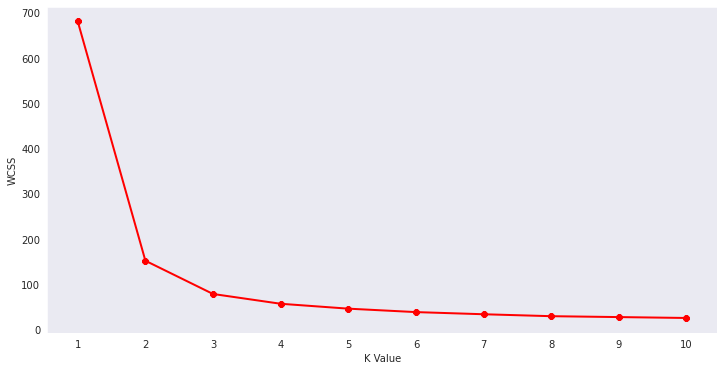

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# plotting the graph
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

We can see that the optimal value of clusters we get is k = 3.

### Average Silhouette Method
The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.</br>
Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.</br>
</br>
We will use the Annual Income and Spending Score to get the Silhoutte Score for our data.

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279
For n_clusters = 6 The average silhouette_score is : 0.36650401502359653
For n_clusters = 7 The average silhouette_score is : 0.3583580240469423
For n_clusters = 8 The average silhouette_score is : 0.34071978677855125
For n_clusters = 9 The average silhouette_score is : 0.3200781833730573
For n_clusters = 10 The average silhouette_score is : 0.3242666969253336


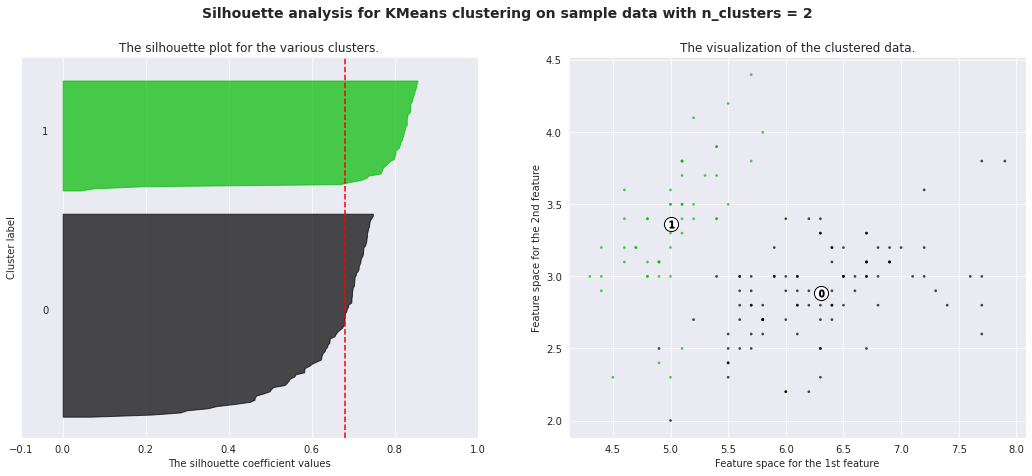

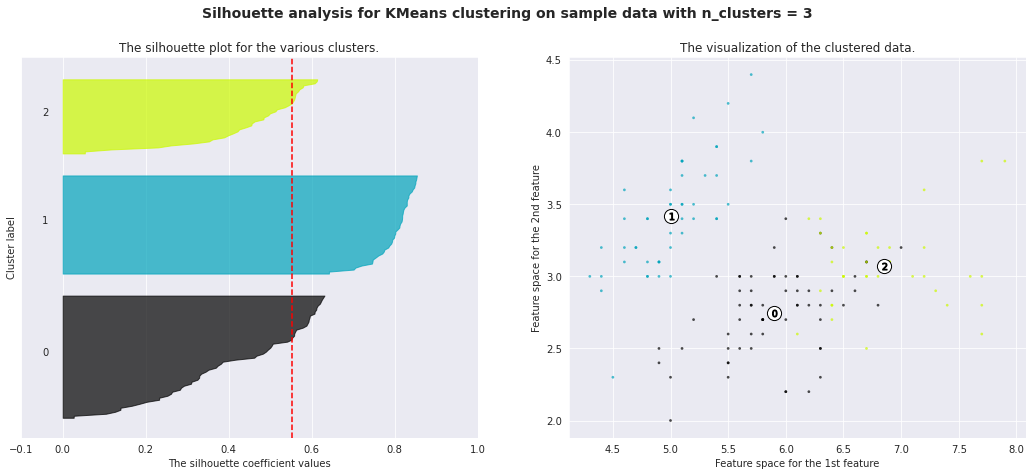

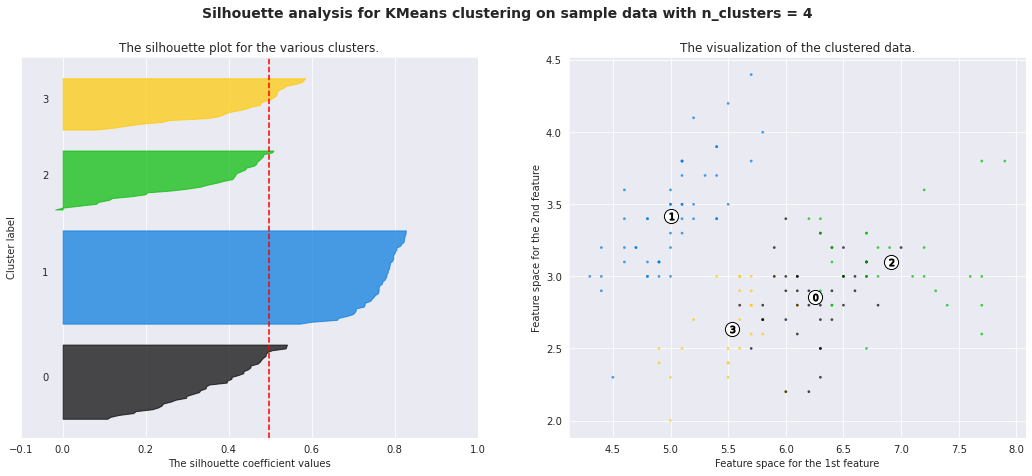

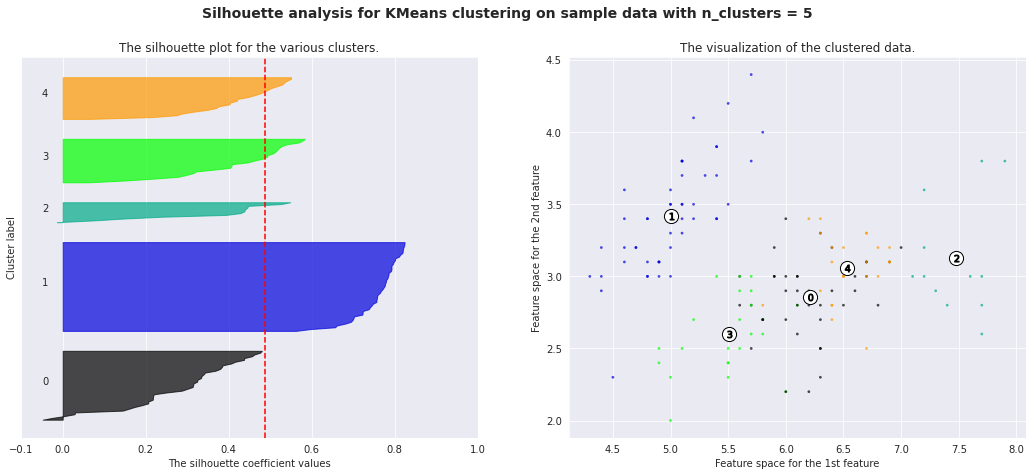

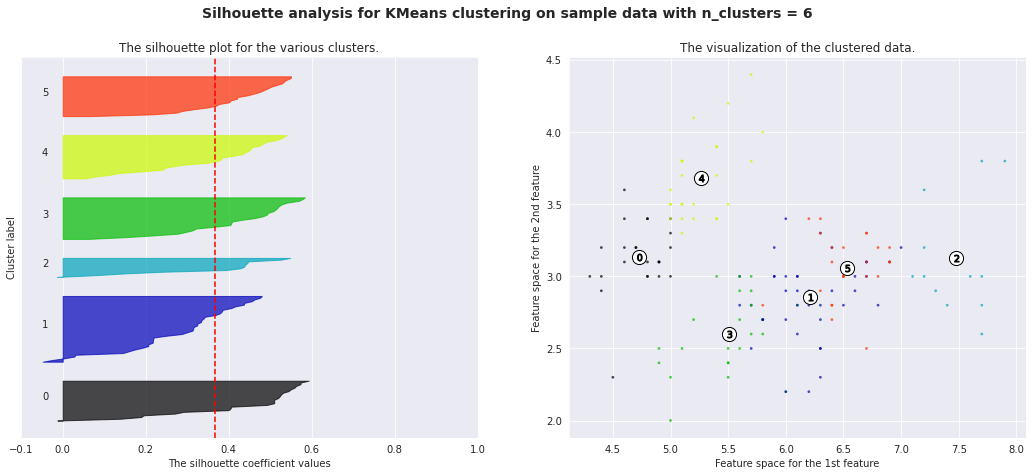

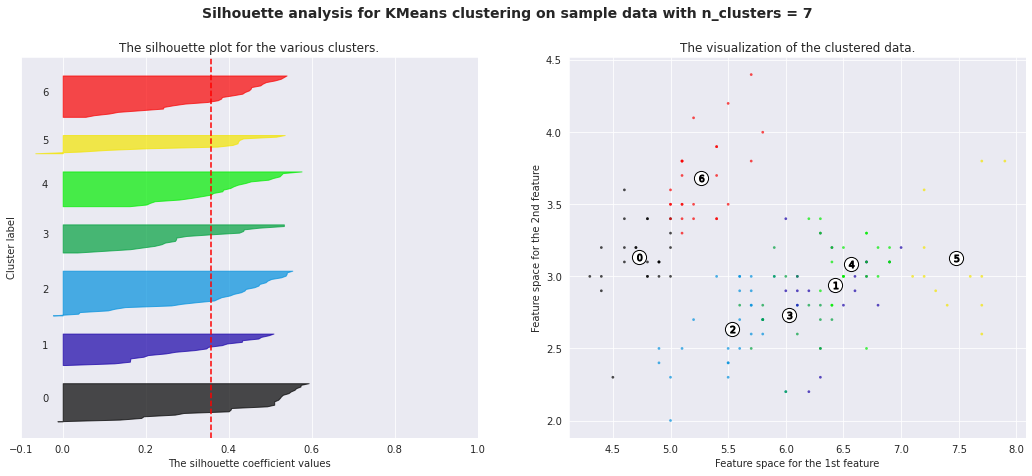

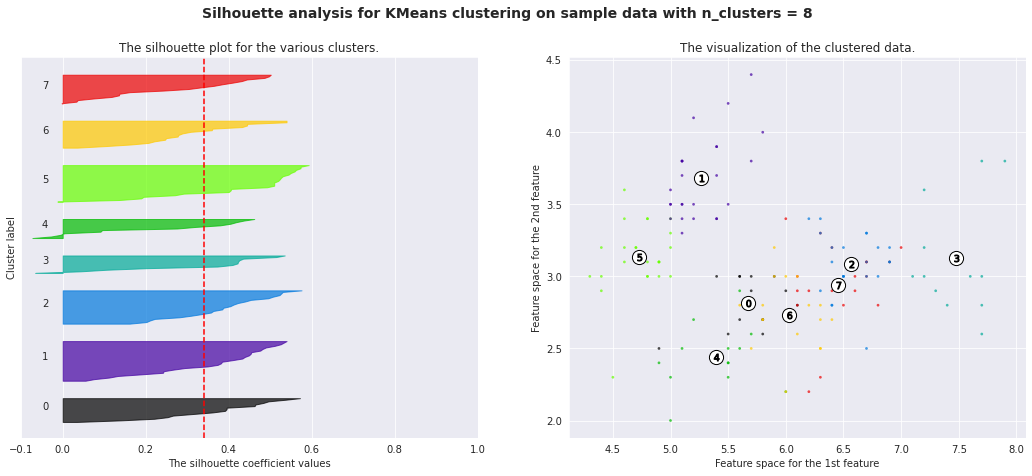

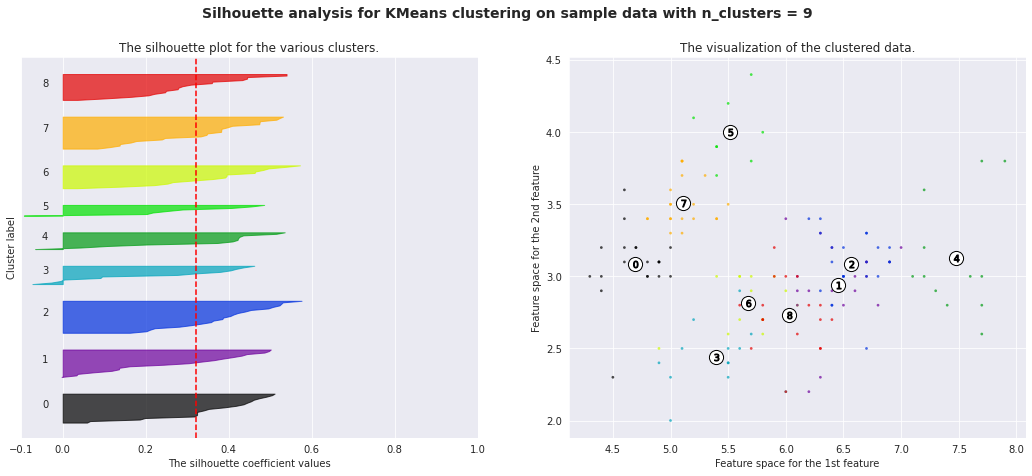

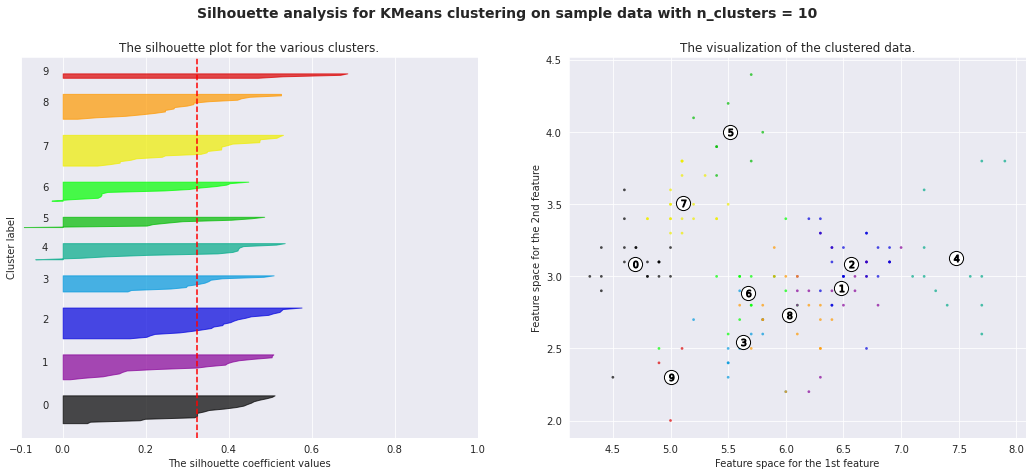

In [11]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but we'll take it as -0.1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " 
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

We can observe that using this method too we get k = 3 and optimal number of cluster because the Silhouette Score of that is the closes to 1. This means at k = 3 most of the points were assigned to their right clusters. 

## 4. Making predictions with Sci-Kit Learn

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Plotting graph for the predictions we made.

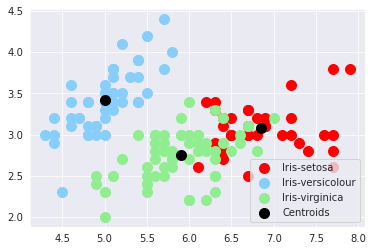

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightskyblue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

## 5. K-Means Using Euclidean Distance

In [14]:
m=X.shape[0] #Number of training examples
n=X.shape[1] #Number of features. 
K = 3 #Number of clusters
n_iter = 1000 #Number of iterations

**Step 1**: Initialize the centroids randomly from the data points. Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.

In [15]:
import random
centroids=np.array([]).reshape(n,0) 

for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

**Step 2(a)**: For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance. The output of our algorithm should be a dictionary with cluster number as Keys and the data points which belong to that cluster as values. 

We find the euclidian distance from each point to all the centroids and store in a m X K matrix. So every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids. Then we find the minimum distance and store the index of the column in a vector C.

In [16]:
output={}

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between for each centroid
for k in range(K):
    dist=np.sum((X-centroids[:,k])**2,axis=1)
    euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

**Step 2(b)**: We need to regroup the data points based on the cluster index C and store in the Output dictionary and also compute the mean of separated clusters and assign it as new centroids. Y is a temporary dictionary which stores the solution for one particular iteration.

In [17]:
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(n,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

We loop over n_iter and repeat the step 2(a) and 2(b) as shown

In [18]:
for i in range(n_iter):
    euclid=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((X-centroids[:,k])**2,axis=1)
        euclid=np.c_[euclid,dist]
    C=np.argmin(euclid,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(n,0)
    for k in range(m):
        cent[C[k]]=np.c_[cent[C[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent

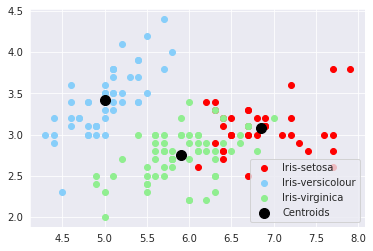

In [19]:
color=['red','lightskyblue','lightgreen']
labels=['Iris-setosa','Iris-versicolour','Iris-virginica']

for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1],c=color[k],label=labels[k])
    
plt.scatter(centroids[0,:],centroids[1,:],s=100,c='black',label='Centroids')

plt.legend()